# Problem statement

A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn import tree

In [158]:
company = pd.read_csv("Company_Data.csv")

In [159]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [160]:
company.shape

(400, 11)

In [161]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


<b>No null values are there</b>

In [162]:
company[company.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<b>No duplicate values are there</b>

### Understanding the target variable

We are interested to know about the The sales value is a continuous value in thousands for each location.attributes which causes high sales.</b>

In [163]:
company['Sales'].value_counts()

7.80     4
6.67     3
8.77     3
9.32     3
5.87     3
        ..
8.89     1
13.39    1
9.14     1
5.07     1
9.50     1
Name: Sales, Length: 336, dtype: int64

### Converting the categorical variables into numerical

There are 3 categorical columns ShelveLoc,Urban,US. We will convert them into numerical by using Encoding techniques.

In [164]:
company['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [165]:
company['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [166]:
company['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [167]:
company = pd.get_dummies(company, columns=['Urban'])

In [168]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,US,Urban_No,Urban_Yes
0,9.50,138,73,11,276,120,Bad,42,17,Yes,0,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,0,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,No,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,0,1
396,6.14,139,23,3,37,120,Medium,55,11,Yes,1,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,0,1
398,5.94,100,79,7,284,95,Bad,50,12,Yes,0,1


In [169]:
company = pd.get_dummies(company, columns=['US'])

In [170]:
label_encoder = preprocessing.LabelEncoder()

In [171]:
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc']) 
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0


In [172]:
company['Sales_cat'] = pd.cut(x=company['Sales'], bins=[0, 5.5, 11, 16.5], labels=['Low','Medium','High'], right=False)
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes,Sales_cat
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1,Medium
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1,High
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1,Medium
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1,Medium
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0,Low


In [173]:
company['Sales_cat'].value_counts()

Medium    248
Low       103
High       49
Name: Sales_cat, dtype: int64

### Separating feature data and Label data and train-test split

In [174]:
X = company.drop('Sales',axis=1)
X = company.drop('Sales_cat',axis=1)
X

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,0,1,0,1
396,6.14,139,23,3,37,120,2,55,11,1,0,0,1
397,7.41,162,26,12,368,159,2,40,18,0,1,0,1
398,5.94,100,79,7,284,95,0,50,12,0,1,0,1


In [175]:
X.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0


In [176]:
Y = company['Sales_cat']

In [177]:
Y

0      Medium
1        High
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398    Medium
399    Medium
Name: Sales_cat, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [178]:
Y.isnull().sum()

0

In [179]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=30)

### Building Decision Tree classifier using Entropy criteria

In [180]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Predicting on train data set

In [181]:
preds_train_dt = model.predict(X_train) 
pd.Series(preds_train_dt).value_counts()

Medium    192
Low        85
High       43
dtype: int64

In [182]:
X_train.shape

(320, 13)

In [183]:
pd.crosstab(Y_train,preds_train_dt)

col_0,High,Low,Medium
Sales_cat,,,
Low,0,85,0
Medium,0,0,192
High,43,0,0


### Predicting on test data set

In [184]:
preds_dt = model.predict(X_test) 
pd.Series(preds_dt).value_counts()

Medium    57
Low       18
High       5
dtype: int64

In [185]:
pd.crosstab(Y_test,preds_dt)

col_0,High,Low,Medium
Sales_cat,,,
Low,0,18,0
Medium,0,0,56
High,5,0,1


<b>Checking test accuracy</b>

In [186]:
accuracy = accuracy_score(Y_test,preds_dt)
print(accuracy)

0.9875


<b>Checking train accuracy</b>

In [187]:
accuracy = accuracy_score(Y_train,preds_train_dt)
print(accuracy)

1.0


If we compare the train and test accuracy, we don't have much difference so there is no overfitting problem in our model

[Text(535.6800000000001, 543.6, 'X[0] <= 5.495\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]'),
 Text(267.84000000000003, 326.16, 'entropy = 0.0\nsamples = 85\nvalue = [0, 85, 0]'),
 Text(803.5200000000001, 326.16, 'X[0] <= 11.075\nentropy = 0.687\nsamples = 235\nvalue = [43, 0, 192]'),
 Text(535.6800000000001, 108.72000000000003, 'entropy = 0.0\nsamples = 192\nvalue = [0, 0, 192]'),
 Text(1071.3600000000001, 108.72000000000003, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]')]

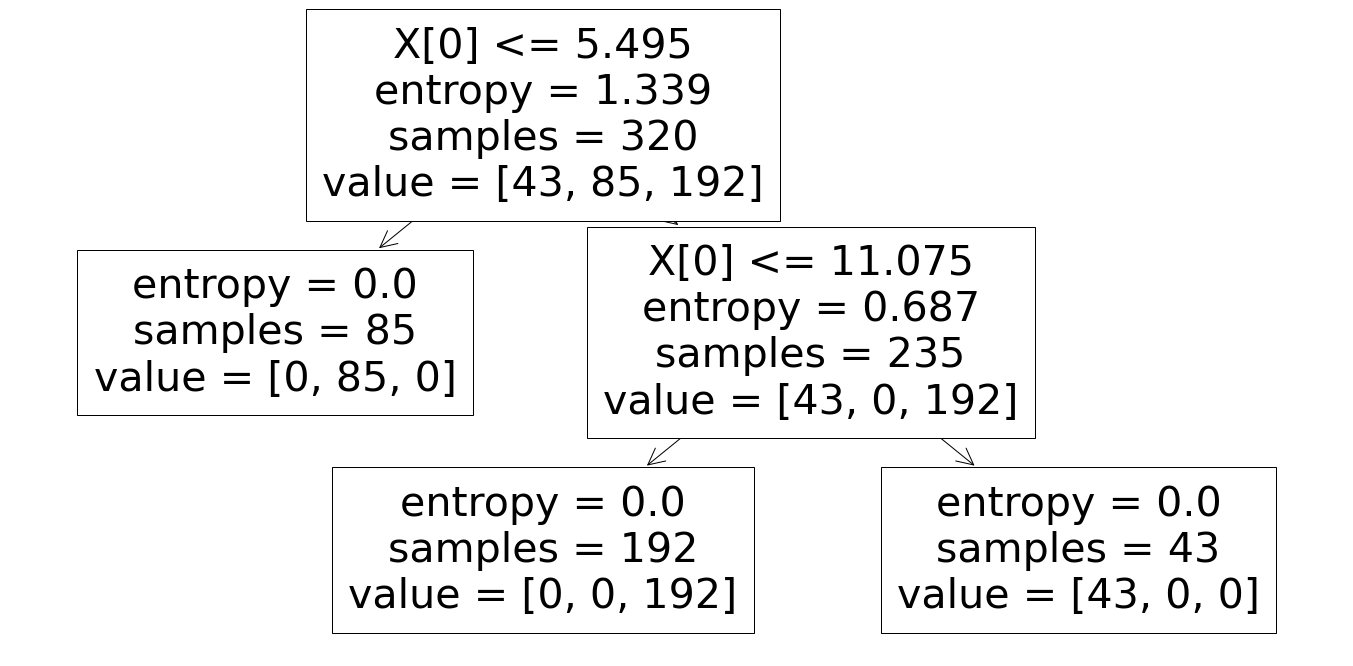

In [188]:
plt.figure(figsize=(24,12))
tree.plot_tree(model)

In [189]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban_No','Urban_Yes','US_No','US_Yes']
cn=['High', 'Low', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12,12), dpi=800)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn, filled = True,fontsize =10)

[Text(2976.0, 6040.0, 'CompPrice <= 5.495\nentropy = 1.339\nsamples = 320\nvalue = [43, 85, 192]\nclass = Medium'),
 Text(1488.0, 3624.0, 'entropy = 0.0\nsamples = 85\nvalue = [0, 85, 0]\nclass = Low'),
 Text(4464.0, 3624.0, 'CompPrice <= 11.075\nentropy = 0.687\nsamples = 235\nvalue = [43, 0, 192]\nclass = Medium'),
 Text(2976.0, 1208.0, 'entropy = 0.0\nsamples = 192\nvalue = [0, 0, 192]\nclass = Medium'),
 Text(5952.0, 1208.0, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0, 0]\nclass = High')]

<b>Looking at the above tree, we can see that CompPrice is the most important attribute for causing higher sales</b>